In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

## Initialise Variables

In [2]:
x, y, u, v = symbols('x y u v')
rho, p = symbols('rho p')
k, eps = symbols('k epsilon')
c0 = symbols('c_0')

In [3]:
def get_sym_grad(scal_f):
    """
    Returns the symbolic gradient of a scalar function.
    """
    x, y = symbols('x y')
    grad_f = Matrix([diff(scal_f, x), diff(scal_f, y)])
    return grad_f

def get_sym_div(vec_f):
    """
    Returns the symbolic divergence of a vector function.
    """
    x, y = symbols('x y')
    div_f = diff(vec_f[0], x) + diff(vec_f[1], y)
    return div_f

## Setup Constants

In [4]:
L = 1
Cd = 0.09
sigma_k = 1.0
sigma_eps = 1.3
C1eps = 1.44
C2eps = 1.92

## Setup variables

In [5]:
u = -cos(2*pi*x)*sin(2*pi*y)
v = sin(2*pi*x)*cos(2*pi*y)
vmag = sqrt(u**2 + v**2)
u, v

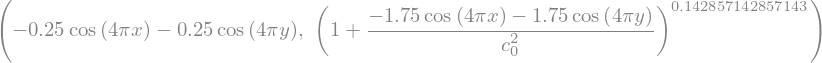

In [6]:
p = -0.25*(cos(4*pi*x) + cos(4*pi*y))
rho = (p*7/c0**2 + 1)**(1/7)
p, rho

In [7]:
# k = 0.5*vmag**2
# eps = 0.09*k**(3/2)
k = vmag**2
eps = k
k, eps

## Calculate RHS of k-eps equations

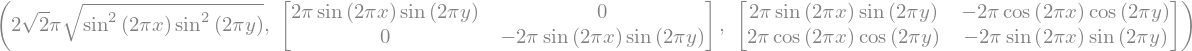

In [8]:
grad_u = Matrix([[diff(u, x), diff(u, y)], [diff(v, x), diff(v, y)]])
S = (grad_u + grad_u.T)/2
frob_S = sqrt(S[0, 0]**2 + 2*S[0, 1]**2 + S[1, 1]**2)
frob_S, S, grad_u

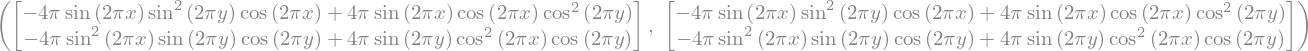

In [9]:
grad_k = get_sym_grad(k)
grad_eps = get_sym_grad(eps)
grad_k, grad_eps

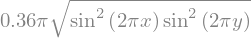

In [10]:
Pk = Cd * sqrt(2) * frob_S
Pk

### k equation

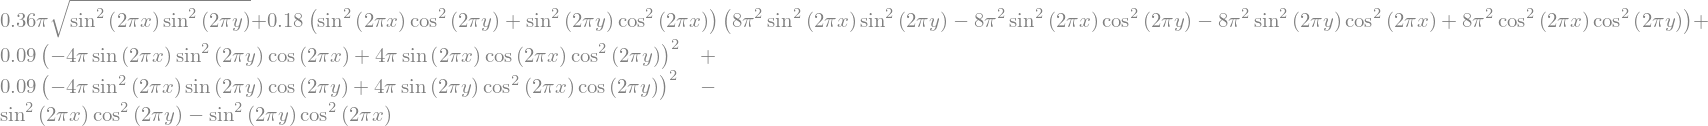

In [11]:
k_div = get_sym_div((k*k/eps)*grad_k)
k_rhs = (Cd/sigma_k)*k_div + Pk - eps
k_rhs

### eps equation

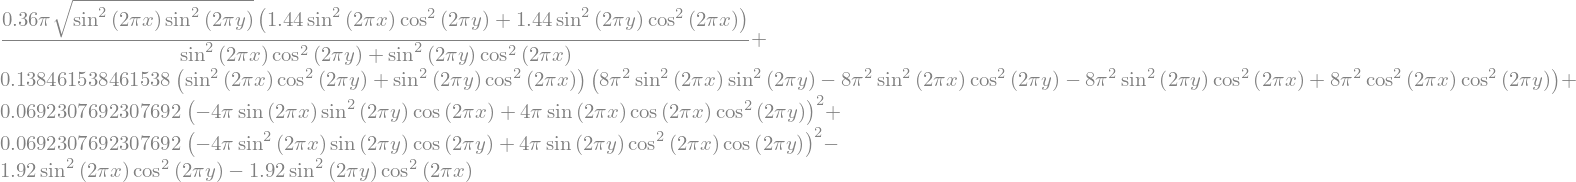

In [12]:
eps_div = get_sym_div((k*k/eps)*grad_eps)
eps_rhs = (Cd/sigma_eps)*eps_div + C1eps*eps*Pk/k - C2eps*eps*eps/k
eps_rhs

## Numerical Substitution

In [13]:
# Check if c0 is in the expression
rho.has(c0)
def numerical_subs(sym_var, _x, _y, _c0=10., debug=False):
    if sym_var.has(c0):
        sym_var = sym_var.subs(c0, _c0)
    func = lambdify((x, y), sym_var, 'numpy')
    if debug:
        print(func.__doc__)
        return
    return func(_x, _y)

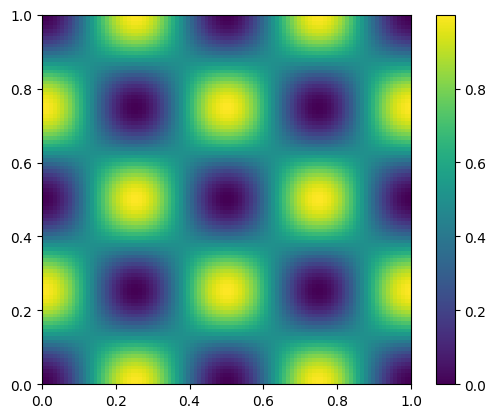

In [14]:
# Plot vmag for a square domain between 0 and L
_x = np.linspace(1e-5, L, 100)
_x, _y = np.meshgrid(_x, _x)
_u = numerical_subs(u, _x, _y)
_v = numerical_subs(v, _x, _y)
_vmag = np.sqrt(_u**2 + _v**2)
_p = numerical_subs(p, _x, _y)
_rho = numerical_subs(rho, _x, _y)

_k = numerical_subs(k, _x, _y)
_eps = numerical_subs(eps, _x, _y)

_k_rhs = numerical_subs(k_rhs, _x, _y)
_eps_rhs = numerical_subs(eps_rhs, _x, _y)

plt.imshow(_k, origin='lower', extent=(0, L, 0, L))
plt.colorbar()

## Import from code

In [15]:
from test_k_eps import get_test_solution

d:\IIT Bombay - Miscellaneous\Winter Project\ddp-thesis\code\energy_spectrum.py:29: UserWarning: Numba not installed. Some functions will not be compiled.
  warnings.warn(


In [16]:
_u, _v, _p, _rho, _k, _eps, _k_rhs, _eps_rhs = get_test_solution(
    _x=_x, _y=_y, c0=10
)

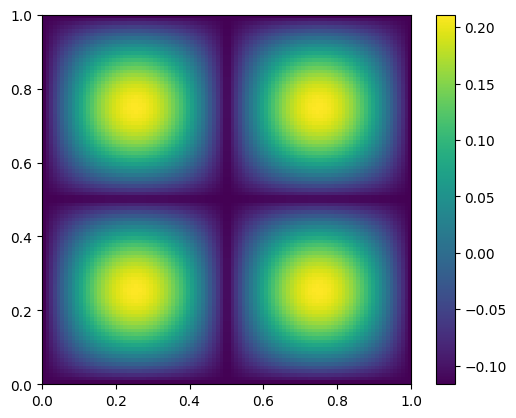

In [20]:
plt.imshow(_eps_rhs, origin='lower', extent=(0, L, 0, L))
plt.colorbar()